In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
from sqlalchemy import Column,String, Integer, ForeignKey,Float
from sqlalchemy.orm import declarative_base
from datetime import datetime 


def pie_chart(df,col, title):
    """
    Parametros:
    ----------
    df : pandas dataframe
    col (string): nombre de la columna del dataframe 
    title (string): título del gráfico 
    
    Resultado:
    -------
    Despliega un gráfico de torta con las etiquetas y la proporción 
    (%) de los datos
    """
    counts = df[col].value_counts()
    counts.plot(kind='pie',autopct='%.0f%%',fontsize=20, figsize=(12, 10))
    plt.title(title)
    plt.show()

df=pd.read_csv(r"C:\Users\ALEXIS\Documents\AXIELS\Documentos Alexis\Estudio\Cursos virtuales\datos y visualizacion MIN-TIC\python\import.csv",sep=",",encoding = "ISO-8859-1")



data importada

In [64]:
print(df.head(5))
print(df.columns)


                                        HS2  HS2 ID          Section  \
0                              Live animals     101  Animal Products   
1                       Meat & edible offal     102  Animal Products   
2             Fish, crustaceans, & molluscs     103  Animal Products   
3  Edible products of animal origin, n.e.s.     104  Animal Products   
4        Animal originated products, n.e.s.     105  Animal Products   

   Section ID  Trade Value  Year  
0           1   19137801.0  2019  
1           1  386239906.0  2019  
2           1  247651648.0  2019  
3           1  179717234.0  2019  
4           1   12669956.0  2019  
Index(['HS2', 'HS2 ID', 'Section', 'Section ID', 'Trade Value', 'Year'], dtype='object')


In [65]:
#RENONBRE DE COLUMNAS 
change_col={"HS2":"Descripcion_de_subpartida",
                "HS2 ID":"Subpartida",
                "Section":"Seccion",
                "Section ID":"ID_Seccion",
                "Trade Value":"Valor comercial",
                "Year":"Anio"}
df.rename(columns=change_col, inplace=True)
print(df.dtypes)


Descripcion_de_subpartida     object
Subpartida                     int64
Seccion                       object
ID_Seccion                     int64
Valor comercial              float64
Anio                           int64
dtype: object


In [66]:
print(df['Anio'].unique())
print(df.columns)
print(df['Anio'].dtype)


[2019 2020 2021 2022]
Index(['Descripcion_de_subpartida', 'Subpartida', 'Seccion', 'ID_Seccion',
       'Valor comercial', 'Anio'],
      dtype='object')
int64


In [67]:
#FORMATEO DE DATO COLUMNA Año(Anio)
df['Anio'] = pd.to_datetime(df['Anio'], format='%Y', errors='coerce')  # Convertir a datetime
df['Anio'] = df['Anio'].dt.year.astype(str)  # Extraer el año y convertir a string
print(df['Anio'].dtype)  # Verificar que sea string

object


In [68]:
df['ID_Seccion']=df['ID_Seccion'].astype(str)#→cambio de columna de int a str
print(df.dtypes)

Descripcion_de_subpartida     object
Subpartida                     int64
Seccion                       object
ID_Seccion                    object
Valor comercial              float64
Anio                          object
dtype: object


In [69]:
#FORMATEO DE DATO COLUMNA ID_Seccion'
print(df['ID_Seccion'].unique())

df['ID_Seccion']=df['ID_Seccion'].map({
    '1':'Productos animales',
    '2':'Productos vegetales',
    '3':'Subproductos animales y vegetales',
    '4':'Productos alimenticios',
    '5':'Productos minerales',
    '6':'Productos quimicos',
    '7':'Plasticos y cauchos',
    '8':'Cueros de animales',
    '9':'Productos de madera',
    '10':'Articulos de papel',
    '11':'Textiles',
    '12':'Calzado y sombreros',
    '13':'Piedras y vidrios',
    '14':'Metales preciosos',
    '15':'Metales',
    '16':'Maquinas',
    '17':'Transporte',
    '18':'Instrumentos',
    '19':'Armas',
    '20':'Varios',
    '21':'Artes y antiguedades'      
})
print(df['ID_Seccion'].unique())

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21']
['Productos animales' 'Productos vegetales'
 'Subproductos animales y vegetales' 'Productos alimenticios'
 'Productos minerales' 'Productos quimicos' 'Plasticos y cauchos'
 'Cueros de animales' 'Productos de madera' 'Articulos de papel'
 'Textiles' 'Calzado y sombreros' 'Piedras y vidrios' 'Metales preciosos'
 'Metales' 'Maquinas' 'Transporte' 'Instrumentos' 'Armas' 'Varios'
 'Artes y antiguedades']


In [70]:

df['Seccion'] = df['Seccion'].str.replace('1Animal Products', 'Productos animales')
df['Seccion'] = df['Seccion'].str.replace('2Vegetable Products', 'Productos vegetales')
df['Seccion'] = df['Seccion'].str.replace('3Animal and Vegetable Bi-Products', 'Subproductos animales y vegetales')
df['Seccion'] = df['Seccion'].str.replace('4Foodstuffs', 'Productos alimenticios')
df['Seccion'] = df['Seccion'].str.replace('5Mineral Products', 'Productos minerales')
df['Seccion'] = df['Seccion'].str.replace('6Chemical Products', 'Productos quimicos')
df['Seccion'] = df['Seccion'].str.replace('7Plastics and Rubbers', 'Plasticos y cauchos')
df['Seccion'] = df['Seccion'].str.replace('8Animal Hides', 'Cueros de animales')
df['Seccion'] = df['Seccion'].str.replace('9Wood Products', 'Productos de madera')
df['Seccion'] = df['Seccion'].str.replace('10Paper Goods', 'Articulos de papel')
df['Seccion'] = df['Seccion'].str.replace('11Textiles', 'Textiles')
df['Seccion'] = df['Seccion'].str.replace('12Footwear and Headwear', 'Calzado y sombreros')
df['Seccion'] = df['Seccion'].str.replace('13Stone And Glass', 'Piedras y vidrios')
df['Seccion'] = df['Seccion'].str.replace('14Precious Metals', 'Metales preciosos')
df['Seccion'] = df['Seccion'].str.replace('15Metals', 'Metales')
df['Seccion'] = df['Seccion'].str.replace('16Machines', 'Maquinas')
df['Seccion'] = df['Seccion'].str.replace('17Transportation', 'Transporte')
df['Seccion'] = df['Seccion'].str.replace('18Instruments', 'Instrumentos')
df['Seccion'] = df['Seccion'].str.replace('19Weapons', 'Armas')
df['Seccion'] = df['Seccion'].str.replace('20Miscellaneous', 'Varios')
df['Seccion'] = df['Seccion'].str.replace('21Arts and Antiques', 'Artes y antiguedades')

In [71]:
#RECURRENCIA  DE AÑOS DE LA MUESTRA
df1 = df.groupby(['Anio'], as_index=False).size()
df1.columns = ['Anio', 'frecuencia']
print(f"recurrencia por dias:\n{df1}")

#RECURRENCIA  DE ID_SECCIONES DE LA MUESTRA
df2 = df.groupby(['ID_Seccion'], as_index=False).size()
df2.columns = ['ID_Seccion', 'frecuencia']
print(f"recurrencia por departamentos:\n{df2}")
print(df2.dtypes)

recurrencia por dias:
   Anio  frecuencia
0  2019          96
1  2020          96
2  2021          96
3  2022          96
recurrencia por departamentos:
                           ID_Seccion  frecuencia
0                               Armas           4
1                Artes y antiguedades           4
2                  Articulos de papel          12
3                 Calzado y sombreros          16
4                  Cueros de animales          12
5                        Instrumentos          12
6                            Maquinas           8
7                             Metales          44
8                   Metales preciosos           4
9                   Piedras y vidrios          12
10                Plasticos y cauchos           8
11             Productos alimenticios          36
12                 Productos animales          20
13                Productos de madera          12
14                Productos minerales          12
15                 Productos quimicos          

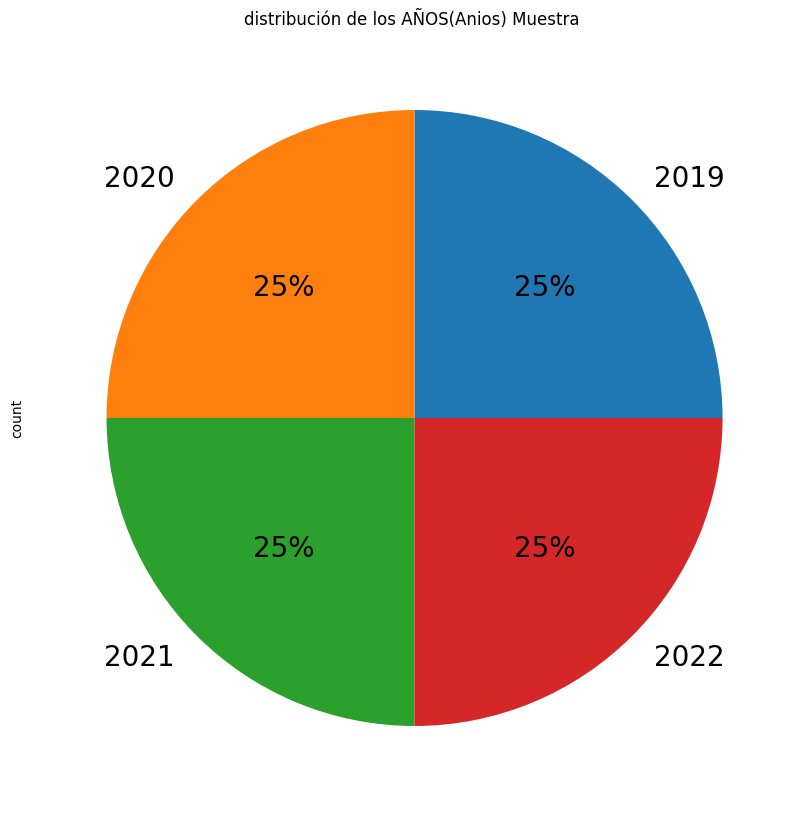

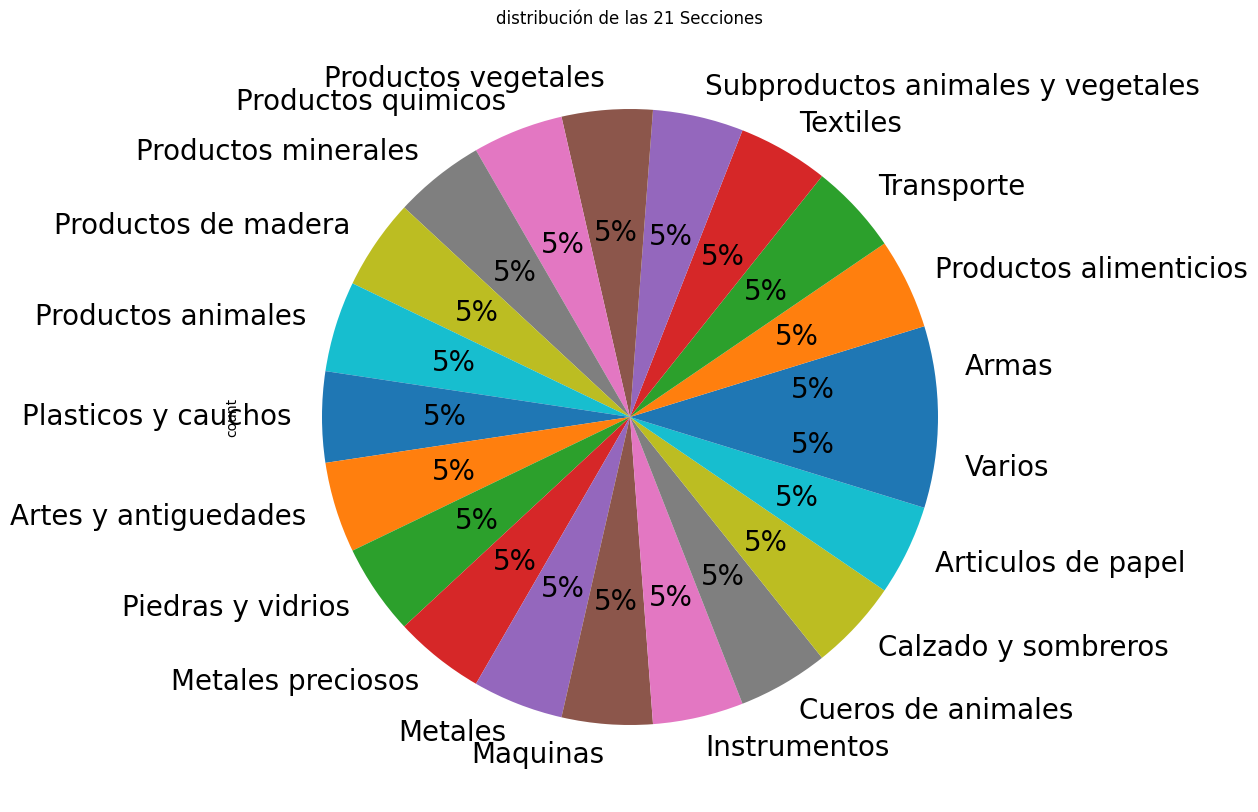

2019
Textiles


In [72]:

#DIAGRAMA DE TORTA
#diagrama de torta AÑOS
pie_chart(df1,'Anio','distribución de los AÑOS(Anios) Muestra ')
#print(df2)

#diagrama de torta x SECCION
pie_chart(df2,'ID_Seccion','distribución de las 21 Secciones')
#print(df3) 

añoganador = str(df1.iloc[df1['frecuencia'].idxmax()].iloc[0])
secganador= str(df2.iloc[df2['frecuencia'].idxmax()].iloc[0])

print(añoganador)
print(secganador)

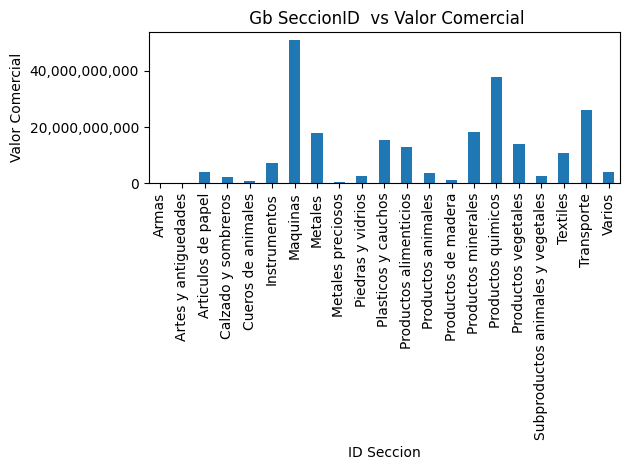

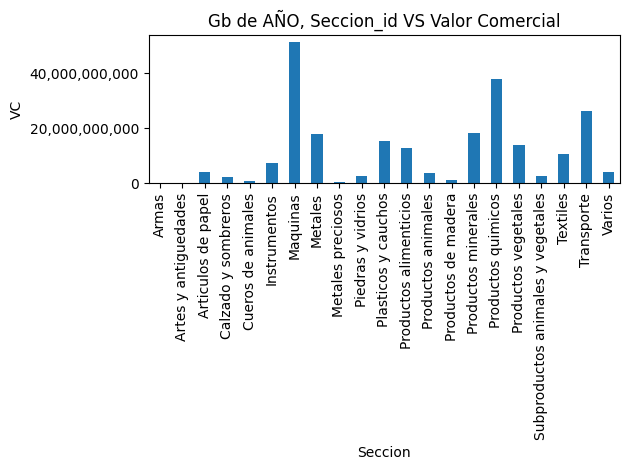

Nombre del seccion con mayores importaciones es:  Maquinas
Valor Total Impotaciones  para Maquinas es:  51200039435.0


In [74]:

#HISTOGRAMA DE SECCION_ID vs VALOR COMERCIAL  (Multi variable)
df['Valor comercial']=df['Valor comercial'].astype(float)
Seccionid_ventas = df.groupby(by=['ID_Seccion']).agg({'Valor comercial': 'sum'})
# Función para formatear el eje y con comas como separadores de miles
def thousands_formatter(x, pos):
    return f'{int(x):,}'
#print(dpt_mas_ventas)
Seccionid_ventas.plot(kind='bar', legend=None)
plt.title(' Gb SeccionID  vs Valor Comercial')
plt.xlabel('ID Seccion')
plt.ylabel('Valor Comercial')
# Aplicar el formateador al eje y
formatter = FuncFormatter(thousands_formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Seccionid_ventas.plot(kind='bar', legend=None)
plt.title('Gb de AÑO, Seccion_id VS Valor Comercial')
plt.xlabel('Seccion')
plt.ylabel('VC')
# Aplicar el formateador al eje y
formatter = FuncFormatter(thousands_formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout();
plt.show()

# Nombre del Seccion  con mas importaciones
sec_mayor = Seccionid_ventas['Valor comercial'].idxmax()#encuentra el índice con valor comercial mas alto

# Total de ventas para ese departamento
Q_total_seccion = Seccionid_ventas.loc[sec_mayor, 'Valor comercial']

print("Nombre del seccion con mayores importaciones es: ", sec_mayor)
print("Valor Total Impotaciones  para" ,sec_mayor, "es: ", Q_total_seccion)



In [ ]:
#----------------------------------------------------------------------------------

#Guardar el reporte de recurrencia y de barras en una tabla independiente en la base de datos(usando sqlalchemy)

Base=declarative_base()

# Definir la tablas para guardar los reportes

#tablas de recurrencia  ID_SECCIONES DE LA MUESTRA
class Recurrencia_Imp(Base):
    __tablename__ = 'Recurrencia_Imp'
    id = Column(Integer, primary_key=True, autoincrement=True)
    Seccion_Name = Column(String(50), nullable=False)
    Frecuencia = Column(Integer, nullable=False)

class Barras_Imp(Base):
    __tablename__ = 'Barras_Imp'
    id = Column(Integer, primary_key=True,autoincrement=True)
    Año = Column(String(50), nullable=False)
    Seccion_id = Column(String(50), nullable=False)
    Valor_comercial = Column(Float, nullable=False)
    
from sqlalchemy import create_engine
usuario='root'
contraseña='3929'
url_servidor='localhost'
puerto='3306'
esquema='ejer_2_SQL'
plugin_autenticación='mysql_native_password'

conexion='mysql+mysqlconnector://{0}:{1}@{2}:{3}/{4}?auth_plugin={5}'
conexion=conexion.format(usuario,contraseña,url_servidor,puerto,esquema,plugin_autenticación)

engine=create_engine(conexion)
print("Conexión a la base de datos establecida con éxito.")


from sqlalchemy.orm import sessionmaker

# Crear todas las tablas en la base de datos
Base.metadata.drop_all(engine)
Base.metadata.create_all(engine)
print("Tablas creadas con éxito.")

# Crear la sesión
Session=sessionmaker(bind=engine)
session=Session()

# Insertar datos de recurrencia
for _, row in df2.iterrows():
    reporte_recurrencia = Recurrencia_Imp(Seccion_Name=row['ID_Seccion'], Frecuencia=row['frecuencia'])
    session.add(reporte_recurrencia)



# Insertar datos de barras

for index, row in Seccionid_ventas2.iterrows():
    Anio, ID_Seccion = index
    valorcomercial = row['Valor comercial']  # Seleccionar la columna de ventas
    reporte_barras = Barras_Imp(Año=Anio, Seccion_id=ID_Seccion, Valor_comercial=valorcomercial)
    #IMPORTANTE  LA PRIMERA VARIABLE HACE REFERENCIA AL NOMBRE DE LA COLUMNA  DE LA TABLA CREADA Y DESPUES DEL
    #IGUAL ES DE DONDE SE VA A IMPORTAR LA DATA → Año columna de la tabla = Anio COLUMNA DE DATA EN EL DF O TABLA
    session.add(reporte_barras)

# Guardar los cambios en la base de datos
try:
    session.commit()
    print("Datos insertados con Exito.")
except Exception as e:
    session.rollback()
    print(f"Error al insertar datos: {e}")
finally:
    session.close()
    print("Sesión cerrada.")
